In [236]:
import pandas as pd
import datetime as dt
from game_log import load_current_line
import matplotlib.pyplot as plt

today = dt.datetime.today()
year = today.year
month = today.month
day = today.day
today_str = f'{year}_{month}_{day}'

pp_path = f'Lines/pp/pp_{today_str}.csv'
unabated_path = f'Lines/unabated/unabated_{today_str}.csv'
dog_path = f'Lines/dog/doglines_{today.month}_{today.day}.csv'

pp_lines = load_current_line(pp_path,'prop_id','time')
unabated = load_current_line(unabated_path,'prop_id','time')
#dog_lines = pd.read_csv(dog_path,index_col=0)

In [237]:
#pp_lines['date'] = pp_lines["date"].apply(lambda x: pd.to_datetime(x,utc=True))
#unabated["event_time"].apply(lambda x: pd.to_datetime(x,utc=True))

In [238]:
nba = pp_lines.loc[pp_lines.league_id==7]
combined = unabated.merge(pp_lines[['player','line','stat']],how='inner', on=['player','stat'],suffixes=['_u','_pp'])
combined

,prop_id,player,player_id,line_u,stat,league_id,event_time,opp,Team,count,over_prob,under_prob,pred,time,line_pp
0,00105134-b,D'Onta Foreman,36680,4.5,Receiving Yards,1,2023-11-05 12:00:00-06:00,NO,CHI,1,0.500000,0.500000,5.538166,2023-11-02 16:33:00,4.5
1,00105134-b,D'Onta Foreman,36680,5.5,Receiving Yards,1,2023-11-05 12:00:00-06:00,NO,CHI,14,0.488553,0.511447,5.538166,2023-11-02 16:33:00,4.5
2,ad9b323f-3,Kyren Lacy,173609,30.5,Receiving Yards,2,2023-11-04 18:45:00-05:00,BAMA,LSU,2,0.505230,0.494770,31.407057,2023-11-02 16:33:00,31.5
3,ad9b323f-3,Kyren Lacy,173609,31.5,Receiving Yards,2,2023-11-04 18:45:00-05:00,BAMA,LSU,4,0.503868,0.496132,31.407057,2023-11-02 16:33:00,31.5
4,acf99f94-f,Dallas Goedert,35761,41.5,Receiving Yards,1,2023-11-05 15:25:00-06:00,PHI,DAL,1,0.500000,0.500000,42.926273,2023-11-02 16:33:00,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,544227f0-a,Jeremy Sochan,43480,9.5,PTS,3,2023-11-02 21:00:00-05:00,PHX,SAS,15,0.494958,0.505042,9.626845,2023-11-02 16:33:00,4.5
1214,52b914f3-b,Devin Booker,43351,6.5,AST,3,2023-11-02 21:00:00-05:00,PHX,SAS,9,0.481240,0.518760,6.546604,2023-11-02 16:33:00,6.5
1215,52076675-9,Myles Price,61890,39.5,Receiving Yards,2,2023-11-02 18:00:00-05:00,TT,TCU,5,0.497311,0.502689,40.935368,2023-11-02 16:33:00,41.5
1216,52076675-9,Myles Price,61890,41.5,Receiving Yards,2,2023-11-02 18:00:00-05:00,TT,TCU,2,0.500000,0.500000,40.935368,2023-11-02 16:33:00,41.5


In [239]:
combined = combined[['prop_id', 'player','line_u','line_pp', 'player_id', 'stat', 
       'event_time', 'opp', 'Team', 'count', 'over_prob', 'under_prob', 'pred',]]

In [240]:
combined.loc[combined.player=='Scottie Barnes']

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
568,d8049b2f-3,Scottie Barnes,7.5,7.5,43472,TRB,2023-11-02 18:00:00-05:00,PHI,TOR,14,0.512063,0.487937,7.750966
721,30fc7bf5-3,Scottie Barnes,12.5,12.5,43472,TRB+AST,2023-11-02 18:00:00-05:00,PHI,TOR,8,0.512484,0.487516,12.777720
804,04135bef-2,Scottie Barnes,4.5,4.5,43472,AST,2023-11-02 18:00:00-05:00,PHI,TOR,15,0.526012,0.473988,4.810577
886,16024cbc-b,Scottie Barnes,18.5,9.5,43472,PTS,2023-11-02 18:00:00-05:00,PHI,TOR,15,0.506206,0.493794,18.734299
887,16024cbc-b,Scottie Barnes,18.5,4.0,43472,PTS,2023-11-02 18:00:00-05:00,PHI,TOR,15,0.506206,0.493794,18.734299
888,16024cbc-b,Scottie Barnes,18.5,18.5,43472,PTS,2023-11-02 18:00:00-05:00,PHI,TOR,15,0.506206,0.493794,18.734299
948,619f63ef-f,Scottie Barnes,26.5,26.5,43472,PTS+TRB,2023-11-02 18:00:00-05:00,PHI,TOR,7,0.513020,0.486980,26.908984
949,619f63ef-f,Scottie Barnes,27.5,26.5,43472,PTS+TRB,2023-11-02 18:00:00-05:00,PHI,TOR,1,0.476141,0.523859,26.908984
1029,70a81050-c,Scottie Barnes,31.5,16.0,43472,PTS+TRB+AST,2023-11-02 18:00:00-05:00,PHI,TOR,14,0.505756,0.494244,31.789333
1030,70a81050-c,Scottie Barnes,31.5,32.0,43472,PTS+TRB+AST,2023-11-02 18:00:00-05:00,PHI,TOR,14,0.505756,0.494244,31.789333


In [241]:
combined.loc[combined.line_u == combined.line_pp].sort_values(by='over_prob').head(15)

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
766,10f0c1bd-2,Diontae Johnson,5.50,5.50,37916,Receptions,2023-11-02 19:15:00-05:00,PIT,TEN,10,0.465172,0.534828,5.406624
56,a9f283b0-0,Mike Evans,4.50,4.50,36822,Receptions,2023-11-05 12:00:00-06:00,HOU,TB,4,0.469059,0.530941,4.504115
1062,45b3d37b-e,Cade Cunningham,4.50,4.50,242200,TRB,2023-11-02 19:00:00-05:00,NOP,DET,13,0.469661,0.530339,4.472825
791,010ae159-0,Ausar Thompson,8.50,8.50,417201,TRB,2023-11-02 19:00:00-05:00,NOP,DET,15,0.469960,0.530040,8.455085
100,b43f1ea6-d,Travis Kelce,7.50,7.50,36266,Receptions,2023-11-05 08:30:00-06:00,KC,MIA,16,0.470489,0.529511,7.472574
956,6016256a-8,CJ McCollum,10.50,10.50,43034,TRB+AST,2023-11-02 19:00:00-05:00,NOP,DET,9,0.470978,0.529022,10.440145
207,9c58011d-d,Keldon Johnson,3.50,3.50,242025,AST,2023-11-02 21:00:00-05:00,PHX,SAS,15,0.471968,0.528032,3.537666
996,7a7ab1f0-0,Tre Jones,13.50,13.50,42537,PTS+AST,2023-11-02 21:00:00-05:00,PHX,SAS,8,0.472264,0.527736,13.420687
67,bcf52c82-a,Cedi Osman,8.50,8.50,43241,PTS,2023-11-02 21:00:00-05:00,PHX,SAS,9,0.472838,0.527162,8.426747
938,6e0d7c08-4,Josh Okogie,9.50,9.50,240046,PTS,2023-11-02 21:00:00-05:00,PHX,SAS,9,0.473850,0.526150,9.473004


In [242]:
combined.loc[combined.line_u == combined.line_pp].sort_values(by='over_prob').tail(15)

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
288,ec98aae1-f,Tobias Harris,5.5,5.5,5424,TRB,2023-11-02 18:00:00-05:00,PHI,TOR,15,0.522654,0.477346,5.804119
984,7ddd79e9-8,John Collins,0.5,0.5,43567,STL,2023-11-02 20:00:00-05:00,UTA,ORL,12,0.522695,0.477305,0.737887
240,9f111e3d-3,Kelly Olynyk,0.5,0.5,241774,3P,2023-11-02 20:00:00-05:00,UTA,ORL,6,0.523977,0.476023,0.740561
1161,5d34fbe0-4,Devin Vassell,1.5,1.5,242453,BLK+STL,2023-11-02 21:00:00-05:00,PHX,SAS,5,0.524861,0.475139,1.756934
641,23b4776b-d,Dennis Schroder,12.5,12.5,242105,PTS,2023-11-02 18:00:00-05:00,PHI,TOR,7,0.525095,0.474905,13.168936
1121,44726d41-2,Jakob Poeltl,18.5,18.5,42579,PTS+TRB+AST,2023-11-02 18:00:00-05:00,PHI,TOR,6,0.525102,0.474898,18.971732
985,7d006674-3,John Collins,7.5,7.5,43567,TRB,2023-11-02 20:00:00-05:00,UTA,ORL,15,0.525528,0.474472,7.844521
804,04135bef-2,Scottie Barnes,4.5,4.5,43472,AST,2023-11-02 18:00:00-05:00,PHI,TOR,15,0.526012,0.473988,4.810577
1126,41621ed4-e,Allen Robinson,1.5,1.5,35753,Receptions,2023-11-02 19:15:00-05:00,PIT,TEN,13,0.527799,0.472201,1.766582
1033,70c8d43f-2,Darnell Mooney,2.5,2.5,38306,Receptions,2023-11-05 12:00:00-06:00,NO,CHI,11,0.528281,0.471719,2.788037


In [243]:
full = pd.read_csv(unabated_path,index_col=0)
full = full.sort_values(by=['prop_id','line','time'])

In [244]:
full.loc[full.prop_id == 'ffd11c66-b']

,prop_id,player,player_id,line,stat,league_id,event_time,opp,Team,count,over_prob,under_prob,pred,time


In [246]:
nba = pd.read_csv(pp_path,index_col=0)
nba['time'] = pd.to_datetime(nba['time'])
nba = nba.sort_values(by='time')
result = nba.groupby(['player', 'stat','league_id']).apply(lambda x: x.sort_values(by='time')['line'].tolist())

# Reset the index of the resulting DataFrame
result = result.reset_index()

# Rename columns for clarity
result.columns = ['player', 'stat','league_id', 'lines']

In [247]:
result.loc[result.player=='Luka Doncic']

,player,stat,league_id,lines


In [248]:
test = pd.read_csv('Lines/unabated/unabated_2023_11_1.csv',index_col=0)
test = test.sort_values(by='time')
test

,prop_id,player,player_id,line,stat,league_id,event_time,opp,Team,count,over_prob,under_prob,pred,time
2387,ffd11c66-b,Luka Doncic,93,10.5,TRB,3,2023-11-01 19:30:00-05:00,DAL,CHI,7,0.458455,0.541545,10.300135,2023-11-01 11:31:00
797,54b2c193-8,Jordan Clarkson,43106,5.0,AST,3,2023-11-01 20:00:00-05:00,UTA,MEM,2,0.500000,0.500000,5.363394,2023-11-01 11:31:00
796,548a88d7-e,Brandon Ingram,42496,5.5,TRB,3,2023-11-01 18:30:00-05:00,OKC,NOP,6,0.465273,0.534727,5.426168,2023-11-01 11:31:00
795,548a88d7-e,Brandon Ingram,42496,5.0,TRB,3,2023-11-01 18:30:00-05:00,OKC,NOP,1,0.500000,0.500000,5.426168,2023-11-01 11:31:00
794,546a16da-d,Jaden McDaniels,42701,4.5,TRB+AST,3,2023-11-01 19:00:00-05:00,MIN,DEN,3,0.417160,0.582840,4.219594,2023-11-01 11:31:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,ac0046b5-6,Kyle Anderson,43364,1.5,STL,3,2023-11-01 19:00:00-05:00,MIN,DEN,1,0.324427,0.675573,1.165846,2023-11-01 17:02:00
2440,abfa2182-d,Davion Mitchell,42565,0.5,BLK,3,2023-11-01 21:00:00-05:00,GSW,SAC,3,0.278975,0.721025,0.327190,2023-11-01 17:02:00
2439,abf8adaf-3,Bennedict Mathurin,43529,1.5,3P,3,2023-11-01 18:30:00-05:00,BOS,IND,7,0.329710,0.670290,1.173708,2023-11-01 17:02:00
2437,abe18158-7,Kristaps Porzingis,43441,27.5,PTS+TRB,3,2023-11-01 18:30:00-05:00,BOS,IND,9,0.501814,0.498186,27.699333,2023-11-01 17:02:00


In [249]:
result = test.groupby(['player', 'stat','line']).apply(lambda x: pd.Series({
    'pred': x.sort_values(by='time')['pred'].tolist(),
    'time': x.sort_values(by='time')['time'].tolist()
}))

# Reset the index of the resulting DataFrame
result = result.reset_index()
result

,player,stat,line,pred,time
0,A.J. Brown,Receiving Yards,80.5,"[87.24605182718963, 87.24605182718963]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
1,A.J. Brown,Receiving Yards,82.5,"[87.24605182718963, 87.24605182718963]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
2,A.J. Brown,Receiving Yards,90.5,"[87.24605182718963, 87.24605182718963]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
3,A.J. Brown,Receiving Yards,94.5,"[94.68971170407268, 94.68971170407268, 94.6897...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
4,A.J. Brown,Receptions,5.5,"[6.227329792896925, 6.227329792896925]","[2023-11-01 16:37:00, 2023-11-01 17:02:00]"
...,...,...,...,...,...
3971,Zion Williamson,STL,0.5,"[0.866334902890991, 0.866334902890991, 0.87479...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3972,Zion Williamson,TO,3.5,"[3.347300978882844, 3.360734771263139, 3.34049...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3973,Zion Williamson,TRB,6.5,"[6.625684601112955, 6.631454945107124, 6.59143...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3974,Zion Williamson,TRB+AST,10.5,"[10.719682067806316, 10.723411801908968, 10.67...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."


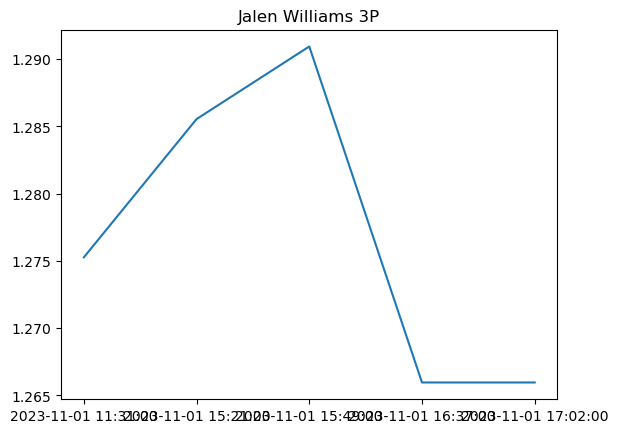

In [250]:

def plot_line_movement(df,idx):
    lines = df.pred.iloc[idx]
    times = df.time.iloc[idx]
    plt.plot(times,lines)
    plt.title(label=(df.loc[idx,'player'] + ' ' + df.loc[idx,'stat']))
    plt.show()
plot_line_movement(result,1766)

In [251]:
result.loc[result.player=='Stephen Curry']

,player,stat,line,pred,time
3546,Stephen Curry,3P,4.5,"[4.868424218682175, 4.859436274380248, 4.86346...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3547,Stephen Curry,AST,5.5,"[5.556613468809646, 5.522609420059362, 5.52472...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3548,Stephen Curry,BLK,0.5,"[0.38585499351359, 0.3854642668765622, 0.38546...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3549,Stephen Curry,BLK+STL,1.5,"[1.4685250982177207, 1.4201760711764395, 1.420...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3550,Stephen Curry,PTS,30.5,"[30.58799484201219, 30.64854902354673, 30.6443...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3551,Stephen Curry,PTS+AST,35.5,"[36.011318234101466, 36.45534303086265, 36.467...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3552,Stephen Curry,PTS+AST,36.5,"[36.011318234101466, 36.45534303086265, 36.467...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3553,Stephen Curry,PTS+TRB,35.5,"[35.6182660851072, 35.695731084311305, 35.6721...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3554,Stephen Curry,PTS+TRB+AST,40.5,"[41.10409771624349, 41.09850933428472, 41.0938...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
3555,Stephen Curry,PTS+TRB+AST,41.5,"[41.10409771624349, 41.09850933428472, 41.0938...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."


In [252]:
result.iloc[1760:1770]

,player,stat,line,pred,time
1760,Jalen Johnson,Techs,0.5,"[0.2306509712547582, 0.2295639963631125, 0.229...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1761,Jalen McMillan,Receiving Yards,84.5,"[84.68851847924107, 84.68851847924107, 84.6885...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1762,Jalen Milroe,Passing Yards,238.5,"[241.7044317065812, 241.7044317065812, 241.704...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1763,Jalen Milroe,Passing Yards,242.5,"[241.7044317065812, 241.7044317065812, 241.704...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1764,Jalen Milroe,Rush Yards,34.5,"[35.4305351962387, 35.4305351962387, 35.430535...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1765,Jalen Milroe,Rush Yards,37.5,"[35.4305351962387, 35.4305351962387, 35.430535...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1766,Jalen Williams,3P,1.5,"[1.275265742917396, 1.285550222522425, 1.29095...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1767,Jalen Williams,AST,3.5,"[3.6926927899738726, 3.692403552640074, 3.6748...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1768,Jalen Williams,BLK,0.5,"[0.4230058652983302, 0.4203312687692887, 0.420...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."
1769,Jalen Williams,BLK+STL,1.5,"[1.6891882198179615, 1.6935793656902267, 1.693...","[2023-11-01 11:31:00, 2023-11-01 15:21:00, 202..."


In [253]:
x.columns

Index(['player', 'stat', 'prop_id', 'lines'], dtype='object')